# Mollweide Plot of JPL Ephemeris Positions

The Mollweide projection is an equal-area, pseudocylindrical map projection generally used for maps of the world or celestial sphere.<br>
Refernce: Constellation boundaries and centers <br>
http://pbarbier.com/constellations/boundaries.html



In [10]:
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import math
from astroquery.jplhorizons import Horizons

desig = 'C/2022 E3'
fullname ='C/2022 E3 (ZTF)'
startdate = '2021-06-01'
stopdate = '2024-07-01'
stepsize= '1d'
jdPerihelion = '2459957.2875671405'


obj = Horizons(id=desig, location='500',epochs={'start':startdate, 'stop':stopdate,'step':stepsize} )
eph = obj.ephemerides()

print('Horizons ephemerides for ' + fullname + ' retrieved from JPL')


Horizons ephemerides for C/2022 E3 (ZTF) retrieved from JPL


In [12]:
from astropy.coordinates import solar_system_ephemeris, EarthLocation
from astropy.coordinates import get_body
from astropy.time import Time

import datetime

ecllon=[]
ecllat = []
ecllonhr=[]
t = Time("2022-01-01 00:00")
loc = EarthLocation.of_site('greenwich') 
with solar_system_ephemeris.set('builtin'):
    while (t < Time("2023-01-01 00:00")):
        sun = get_body('sun', t, loc)
        rasund= sun.ra.deg
        rasundhr=rasund/15
        decsund= sun.dec.deg
        ecllon.append(rasund)
        ecllonhr.append(rasundhr)
        ecllat.append(decsund)
        t += datetime.timedelta(days=7)


In [13]:
raeccliptic=[]
dececcliptic=[]
for x in ecllon:
    raeccliptic.append((180-x)*np.pi/180)
for x in ecllat:
    dececcliptic.append(x*np.pi/180)




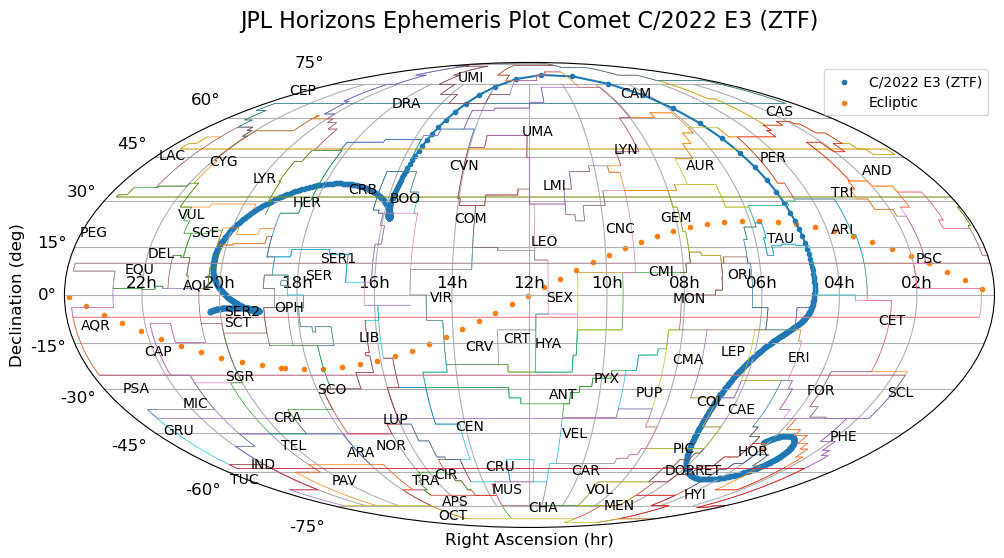

In [14]:
ra = eph.columns[eph.index_column('RA')]
dec = eph.columns[eph.index_column('DEC')]
datetime_str=eph.columns[eph.index_column('datetime_str')]

tmag = eph.columns[eph.index_column('Tmag')]

#http://pbarbier.com/constellations/boundaries.html


title = 'JPL Horizons Ephemeris Plot Comet ' + fullname +'\n'

plt.figure(figsize=(12, 8))
plt.subplot(projection="mollweide")
plt.grid(True)
plt.title(title, fontsize=16)
plt.xlabel('Right Ascension (hr)', fontsize=12)
plt.ylabel('Declination (deg)', fontsize=12)

plt.xticks(fontsize=12, ticks=np.radians([-150, -120, -90, -60, -30, 0, \
                              30, 60, 90, 120, 150]),
            labels=['22h', '20h', '18h', '16h', '14h', '12h', \
                    '10h', '08h', '06h', '04h', '02h'])
plt.yticks(fontsize=12)
plt.scatter((180-ra)*np.pi/180,dec*np.pi/180, marker='.', label=fullname)
plt.plot((180-ra)*np.pi/180,dec*np.pi/180)

plt.scatter(raeccliptic, dececcliptic, marker='.', label='Ecliptic')

# constellationx centers from http://pbarbier.com/constellations/boundaries.html
f = open ('centers_18.txt','r')
for line in f:
    line = line.strip()
    if (len(line) > 0):
        tokens = line.split()
        x = float(tokens[0]) *15
        y = float(tokens[1])
        s = tokens[4]
        x = (180 - 7*len(s) -x)*math.pi/180
        y = y*math.pi/180
        plt.text( x,  y, s)

rac=[]
decc = []
# constellationx boundaries from http://pbarbier.com/constellations/boundaries.html
f = open ('bound_18.txt','r')
lastconstellation ='xxx'
for line in f:
    tokens = line.split()
    if (tokens[2] == lastconstellation):
        rac.append(float(tokens[0]))
        decc.append(float(tokens[1]))
        lastconstellation = tokens[2]
    else:
        lastconstellation = tokens[2]
        rax= 15*np.array(rac)
        decy= np.array(decc)
        raxx = (180-rax)*np.pi/180
        decyy = decy*np.pi/180
        if (len(raxx) > 0):
            plt.plot(raxx, decyy, lw=0.5)

        rac=[]
        decc = []        

plt.legend(loc=0)

plt.show()


## Constellations and Abbreviations

In [26]:
# constellations and abbreviations
f = open ('constellations.txt','r')
for line in f:
    tokens = line.split('|')
    print(tokens[1].strip()+ ': ' + tokens[0].strip())

    


Constellation: Abbr
Andromeda: And
Antila: Ant
Apus: Aps
Aquarius: Aqr
Aquila: Aql
Ara: Ara
Aries: Ari
Auriga: Aur
Bootes: Boo
Caelum: Cae
Camelopardis: Cam
Cancer: Cnc
Canes Venatici: CVn
Canis Major: CMa
Canis Minor: CMi
Capricornus: Cap
Carina: Car
Cassiopeia: Cas
Centaurus: Cen
Cepheus: Cep
Cetus: Cet
Chamaeleon: Cha
Circinus: Cir
Columba: Col
Coma Berenices: Com
Corona Australis: CrA
Corona Borealis: CrB
Corvus: Crv
Crater: Crt
Crux: Cru
Cygnus: Cyg
Delphinus: Del
Dorado: Dor
Draco: Dra
Equuleus: Equ
Eridanus: Eri
Fornax: For
Gemini: Gem
Grus: Gru
Hercules: Her
Horologium: Hor
Hydra: Hya
Hydrus: Hyi
Indus: Ind
Lacerta: Lac
Leo: Leo
LeoMinor: LMi
Lepus: Lep
Libra: Lib
Lupus: Lup
Lynx: Lyn
Lyra: Lyr
Mensa: Men
Microscopium: Mic
Monoceros: Mon
Musca: Mus
Norma: Nor
Octans: Oct
Ophiuchus: Oph
Orion: Ori
Pavo: Pav
Pegasus: Peg
Perseus: Per
Phoenix: Phe
Pictor: Pic
Pisces: Psc
Pisces Austrinus: PsA
Puppis: Pup
Pyxis: Pyx
Reticulum: Ret
Sagitta: Sge
Sagittarius: Sgr
Scorpius: Sco
Sculpto

In [22]:
#eph.write('C2022 E3 (ZTF).fits', format='fits', overwrite=True )

def getConstellation(abbr):
    #constellations and abbreviations
    f = open ('constellations.txt','r')
    name = ''
    for line in f:
        tokens = line.split('|')
        # print(tokens[0]+ ': ' + tokens[1])
        if (abbr == tokens[0]):
            name=tokens[1]
    return name.strip()
            
constellations= eph.columns[eph.index_column('constellation')]
datetime_str=eph.columns[eph.index_column('datetime_str')]

i=0
last  = 'x'
curr = 'x'
print(datetime_str[0][0:11], 'to', datetime_str[-1][0:11])

print('Date', 'Constellation' + ' (Abbr)')
while (i < len(constellations)):
    
    curr = constellations[i]
    if (curr != last):
        datestr = datetime_str[i][0:11]
        # print(i, datetime_str[i], datestr, constellations[i], getConstellation(constellations[i]))
        print(datestr, getConstellation(constellations[i]) + ' (' + constellations[i] +')')
        last = curr
    i = i+1


2021-Jun-01 to 2024-Jul-01
Date Constellation (Abbr)
2021-Jun-01 Aquila (Aql)
2022-May-12 Sagitta (Sge)
2022-May-30 Vulpecula (Vul)
2022-Jun-18 Cygnus (Cyg)
2022-Jun-23 Lyra (Lyr)
2022-Jul-19 Hercules (Her)
2022-Sep-02 Corona Borealis (CrB)
2022-Oct-22 Serpens (Ser)
2022-Dec-10 Corona Borealis (CrB)
2023-Jan-14 Bootes (Boo)
2023-Jan-22 Draco (Dra)
2023-Jan-26 UrsaMinor (UMi)
2023-Jan-29 Camelopardis (Cam)
2023-Feb-05 Auriga (Aur)
2023-Feb-10 Taurus (Tau)
2023-Mar-04 Eridanus (Eri)
2023-Apr-26 Lepus (Lep)
2023-Jul-11 Canis Major (CMa)
2023-Aug-18 Columba (Col)
2023-Sep-02 Puppis (Pup)
2023-Oct-08 Carina (Car)
2023-Oct-21 Pictor (Pic)
2023-Nov-13 Dorado (Dor)
2023-Dec-04 Reticulum (Ret)
2024-Jan-16 Horologium (Hor)
2024-Jul-01 Dorado (Dor)
